# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [10]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


Answer: 400

#### Question 2. Create a summary table

In [12]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: scale, GRE max is 0-800 and GRE is 0-4

#### Question 4. Drop data points with missing data


In [27]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [32]:
df_raw[df_raw.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [38]:
df_no_missing = df_raw.dropna()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

In [39]:
df_no_missing.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 6. Create box plots for GRE and GPA

In [61]:
import seaborn as sns

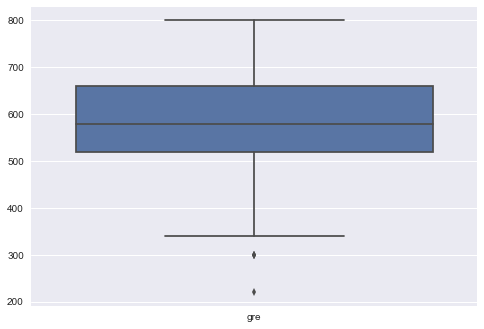

In [42]:
#gre
sns.boxplot(df_no_missing[["gre"]])

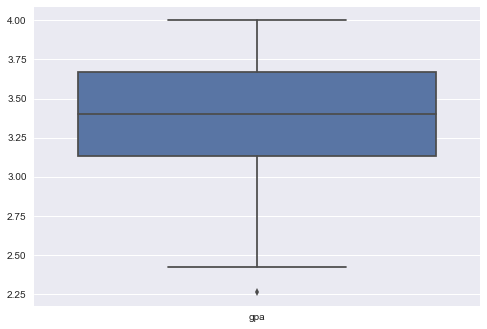

In [43]:
sns.boxplot(df_no_missing[["gpa"]])

#### Question 7. What do this plots show?

Answer: GRE has two outliers and GPA has one. Both have the same skew.

#### Question 8. Describe each distribution 

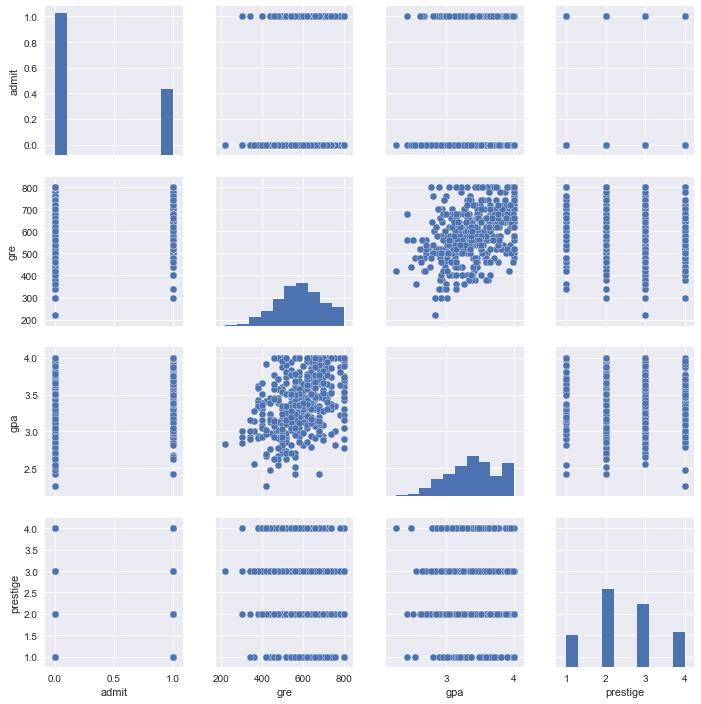

In [48]:
# plot the distribution of each variable 
sns.pairplot(df_no_missing)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. For instance, as shown above, GPA and GRE are skewed by their outliers. Additionally, admit is a bimodal distribution since there are only two values.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. Outliers are skewing the data, which makes the median larger/smaller than the mean.

#### Question 11. Which of our variables are potentially colinear? 

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000
Axes(0.125,0.125;0.62x0.755)


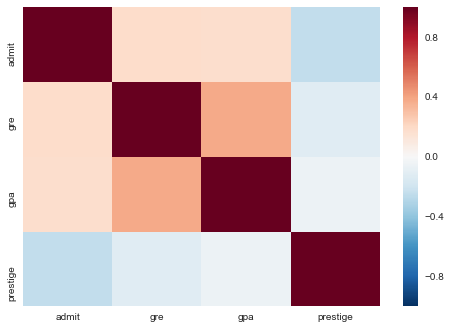

In [53]:
# create a correlation matrix for the data
print df_no_missing.corr()
print sns.heatmap(df_no_missing.corr())

In [60]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # Get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # Start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

# Print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)

# Keep the model
    return algo

y = df_no_missing['admit']
x_sets = (
    ['gre'],
    ['gpa'],
    ['gre', 'gpa'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(df_no_missing[x], y, linear_model.LinearRegression())
    print

gre
P Values: [ 0.00028438]
Coefficients: [ 0.00072978]
y-intercept: -0.111625507561
R-Squared: 0.0328341887544

gpa
P Values: [ 0.00049221]
Coefficients: [ 0.21342491]
y-intercept: -0.406608559967
R-Squared: 0.0303165131821

gre, gpa
P Values: [ 0.00028438  0.00049221]
Coefficients: [ 0.00054068  0.15049607]
y-intercept: -0.510984979394
R-Squared: 0.0457041481302

prestige
P Values: [  9.02347131e-07]
Coefficients: [-0.11985335]
y-intercept: 0.615655183173
R-Squared: 0.0593229494748

gpa
P Values: [ 0.00049221]
Coefficients: [ 0.21342491]
y-intercept: -0.406608559967
R-Squared: 0.0303165131821

prestige, gpa
P Values: [  9.02347131e-07   4.92208600e-04]
Coefficients: [-0.11505671  0.19594904]
y-intercept: -0.0609885698728
R-Squared: 0.084782900424



#### Question 12. What did you find?

Answer: Seems like predictors are not colinear. Although correlation is modest, the difference of R^2 fit explains a larger proportion of values when modeled together. With further analysis we could determine if various prestige scores can be collinear to GRE scores.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
(1) Create dummy variables for categorical data in prestige. 
(2) Determine collinearity using correlation heat maps
(3) For high or low correlation, construct a simple linear model and determine R^2 of various models of predictors

#### Question 14. What is your hypothesis? 

Answer: 
H0: There is no relationship between grad school admissions rates and prestige of undergraduate school
HA: There is some relationship between grad school admissions rates and prestige of undergraduate school

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data